# Pasos inicialies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

In [3]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 10)
colores = cmap(saltos)

Voy hacer un analisis del procentaje ganado por cada año 

In [4]:
entrenamiento = pd.read_csv('/content/drive/My Drive/Orga Datos/tp0 y tp1/Entrenamieto_ECI_2020.csv')
entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


# Filtrando

Me quedo con las columnas de la fecha en que fue creado la oportunidad, y la etapa.

In [5]:
stages_per_date = entrenamiento.loc[:,['Opportunity_Created_Date','Stage']]
stages_per_date['Opportunity_Created_Date'] = pd.to_datetime(stages_per_date['Opportunity_Created_Date'], errors='coerce')
stages_per_date

,Opportunity_Created_Date,Stage
0,2015-12-07,Closed Lost
1,2015-12-07,Closed Won
2,2015-12-08,Closed Won
3,2015-12-08,Closed Lost
4,2015-12-08,Closed Lost
...,...,...
16942,2015-12-04,Closed Won
16943,2015-12-04,Closed Won
16944,2015-12-04,Closed Won
16945,2015-12-05,Closed Lost


Me quedo solo con el año de la fecha, agrupo por el año y etapa, y realizo un conteo de las distintas etapas en cada año

In [6]:
stages_per_date['Year'] = stages_per_date['Opportunity_Created_Date'].dt.year
stages_per_year = stages_per_date.groupby(['Year','Stage']).agg({'Stage':'count'})
stages_per_year

Stage
Year Stage               
2013 Closed Lost        1
2014 Closed Lost       23
     Closed Won        17
2015 Closed Lost      736
     Closed Won       276
2016 Closed Lost     2257
     Closed Won      2098
2017 Closed Lost     2551
     Closed Won      4369
     Proposal           1
2018 Closed Lost     1782
     Closed Won      2773
     Negotiation       18
     Proposal          34
     Qualification     11

In [7]:
#probando
#stages_per_year.plot(kind='bar', figsize=(16,8), title='Percent Stage won per Year', color='lightblue')

Acomodo el dataframe asi quedo mas amigable a la vista.

In [8]:
stages_per_year = stages_per_year.unstack()
stages_per_year


Stage                                              
Stage Closed Lost Closed Won Negotiation Proposal Qualification
Year                                                           
2013          1.0        NaN         NaN      NaN           NaN
2014         23.0       17.0         NaN      NaN           NaN
2015        736.0      276.0         NaN      NaN           NaN
2016       2257.0     2098.0         NaN      NaN           NaN
2017       2551.0     4369.0         NaN      1.0           NaN
2018       1782.0     2773.0        18.0     34.0          11.0

Solamente me interesan las columnas Closed_lost y Closed_won, ya que me interesa saber el porcentaje de las oportunidades ya finalizadas.

In [9]:
stages_per_year.columns = ['Closed_lost', 'Closed_won','Negotiation','Proposal','Qualification']
stages_per_year = stages_per_year.loc[:,['Closed_lost', 'Closed_won']]
stages_per_year

,Closed_lost,Closed_won
Year,,
2013,1.0,NaN
2014,23.0,17.0
2015,736.0,276.0
2016,2257.0,2098.0
2017,2551.0,4369.0
2018,1782.0,2773.0


En el 2013 parece que no hubo ningun caso ganado, por lo que hay un NaN, reemplazamos a este por 0 para poder operar, y calcular el porcentaje de oportunidades ganadas.

In [10]:
stages_per_year = stages_per_year.fillna(0)
stages_per_year['percent_won'] = stages_per_year['Closed_won']*100/(stages_per_year['Closed_lost'] + stages_per_year['Closed_won'])
percent_year = stages_per_year['percent_won']
percent_year

Year
2013     0.000000
2014    42.500000
2015    27.272727
2016    48.174512
2017    63.135838
2018    60.878156
Name: percent_won, dtype: float64

# Graficando

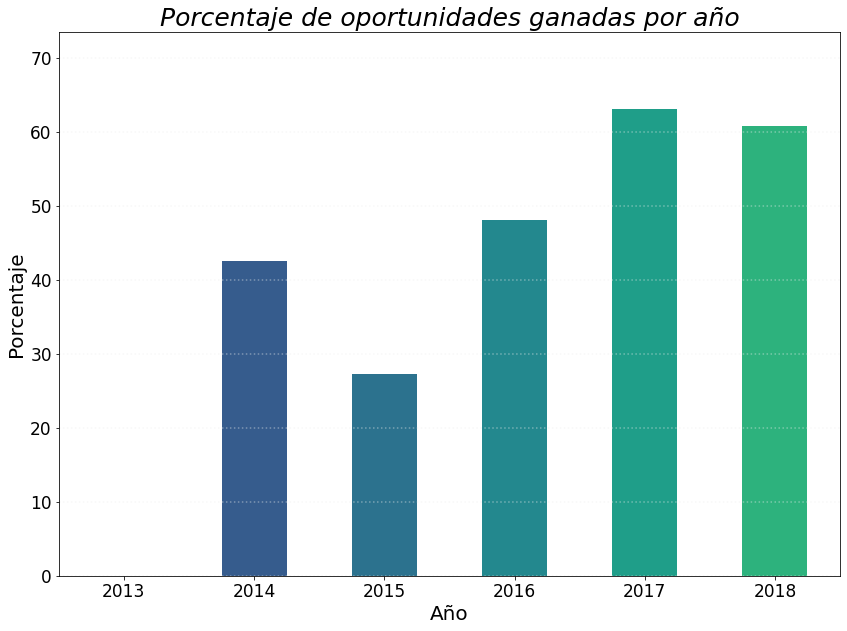

In [15]:
plt.title('Porcentaje de oportunidades ganadas por año', fontsize=25, fontstyle='oblique')
grafiquito = percent_year.plot(kind='bar', figsize=(14,10), rot=360, color=colores, fontsize=17)
ax = plt.gca()
ax.set_ylabel('Porcentaje',fontsize=20)
ax.set_xlabel('Año', fontsize=20)

lineas = grafiquito.get_yticks()
for i in lineas:
      grafiquito.axhline(y=i, linestyle=':', alpha=0.4, color='#eeeeee')

Podemos ver que el año con mas probabilidad de ser aceptado es el año 2017, aunque para el año 2013 resulta medio tramposo este grafico, ya que solo hubo una oportunidad, y esta fallo, por eso el 0% de ganados.

# Probando otros graficos

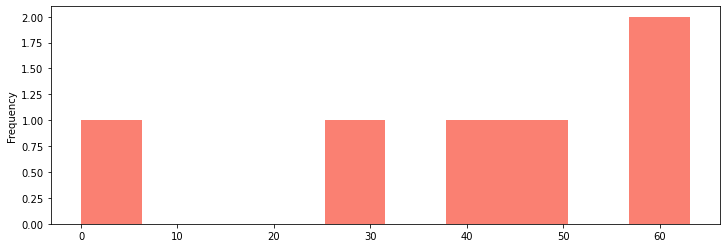

In [12]:
stages_per_year['percent_won'].plot.hist(color='salmon', figsize=(12,4), bins=10)

In [13]:
stages_per_year['percent_lost'] = 100 - stages_per_year['percent_won']
stages_per_year

,Closed_lost,Closed_won,percent_won,percent_lost
Year,,,,
2013,1.0,0.0,0.000000,100.000000
2014,23.0,17.0,42.500000,57.500000
2015,736.0,276.0,27.272727,72.727273
2016,2257.0,2098.0,48.174512,51.825488
2017,2551.0,4369.0,63.135838,36.864162
2018,1782.0,2773.0,60.878156,39.121844


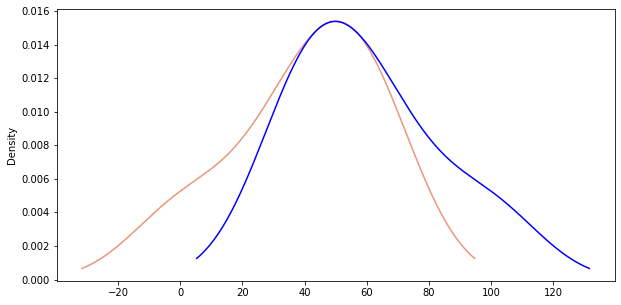

In [14]:
stages_per_year['percent_won'].plot.kde(color='darksalmon', figsize=(10,5))
stages_per_year['percent_lost'].plot.kde(color='blue')